## RFM Modelling

## 1. Import standard Libraries and packages

In [6]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from datetime import date

# 2. Data Loading

In [7]:
# Load excel file, which includes multiple worksheets
xls = pd.ExcelFile('../Resources/KPMG_VI_New_raw_data_update_final.xlsx')

In [8]:
# Assign each worksheet to a variable
CustomerDemographic = pd.read_excel(xls, 'CustomerDemographic', skiprows=[0])
CustomerAddress = pd.read_excel(xls, 'CustomerAddress', skiprows=[0])
Transactions = pd.read_excel(xls, 'Transactions', skiprows=[0])
NewCustomerList = pd.read_excel(xls, 'NewCustomerList', skiprows=[0])

## Transaction Table

In [9]:
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


## Data Quality Analysis

In [10]:
# Check number of rows and columns
Transactions.shape

(20000, 13)

In [11]:
# Data types
Transactions.dtypes

transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date           float64
dtype: object

* Notice, product_first_sold_date column is as float and it represents the number of days passed Dec 30 1899. This column will be converted to date_time.

### 1. Check data accuracy

In [12]:
# Check if transaction_id values are all unique
Transactions_duplicated = Transactions['transaction_id'].duplicated().any()
Transactions_duplicated

False

### 2. Check data completeness

In [13]:
# Count number of empty rows and the percentage of empty rows for each column
empty_rows_count = Transactions.isnull().sum()
empty_rows_perc = empty_rows_count/len(Transactions)*100

null_values_perc = pd.DataFrame(empty_rows_count, columns=['Null_rows_count'])
null_values_perc['Null_rows_percentage'] = empty_rows_perc
null_values_perc


,Null_rows_count,Null_rows_percentage
transaction_id,0,0.000
product_id,0,0.000
customer_id,0,0.000
transaction_date,0,0.000
online_order,360,1.800
order_status,0,0.000
brand,197,0.985
product_line,197,0.985
product_class,197,0.985
product_size,197,0.985


In [14]:
# Show rows without online_order values
Transactions[Transactions.online_order.isnull()]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
97,98,49,333,2017-06-23,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,37823.0
166,167,90,3177,2017-04-26,NaN,Approved,Norco Bicycles,Standard,low,medium,363.01,290.41,38482.0
169,170,6,404,2017-10-16,NaN,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,37838.0
250,251,63,1967,2017-04-11,NaN,Approved,Solex,Standard,medium,medium,1483.20,99.59,42145.0
300,301,78,2530,2017-03-24,NaN,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,35455.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19514,19515,51,690,2017-01-22,NaN,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19573,19574,18,1735,2017-01-15,NaN,Approved,Solex,Standard,medium,medium,575.27,431.45,41345.0
19580,19581,49,1933,2017-10-12,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,41064.0
19635,19636,98,1389,2017-07-26,NaN,Approved,Trek Bicycles,Standard,high,medium,358.39,215.03,38002.0


In [15]:
# Show rows without brand values
Transactions[Transactions.brand.isnull()]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
136,137,0,431,2017-09-23,0.0,Approved,NaN,NaN,NaN,NaN,1942.61,NaN,NaN
159,160,0,3300,2017-08-27,0.0,Approved,NaN,NaN,NaN,NaN,1656.86,NaN,NaN
366,367,0,1614,2017-03-10,0.0,Approved,NaN,NaN,NaN,NaN,850.89,NaN,NaN
406,407,0,2559,2017-06-14,1.0,Approved,NaN,NaN,NaN,NaN,710.59,NaN,NaN
676,677,0,2609,2017-07-02,0.0,Approved,NaN,NaN,NaN,NaN,1972.01,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19340,19341,0,443,2017-12-26,1.0,Approved,NaN,NaN,NaN,NaN,744.54,NaN,NaN
19383,19384,0,2407,2017-06-11,0.0,Approved,NaN,NaN,NaN,NaN,1098.18,NaN,NaN
19793,19794,0,2860,2017-01-13,0.0,Approved,NaN,NaN,NaN,NaN,868.56,NaN,NaN
19859,19860,0,2468,2017-06-24,1.0,Approved,NaN,NaN,NaN,NaN,1497.43,NaN,NaN


- There are 360 rows (1.8%) without online_order indicator. Since they only make up a small fraction of the data. We can drop these rows.
- There are also 197 rows without any product information. These rows have 6 columns with missing values and thus do not add much values to the analysis and ML model. They will also be dropped.

### 3. Check data consistency, misstyped values

In [16]:
Transactions['product_id'].unique()

array([  2,   3,  37,  88,  78,  25,  22,  15,  67,  12,   5,  61,  35,
        16,  79,  33,  54,  27,  82,  89,  64,  19,  72,  91,   1,  99,
         0,  92,  14,  44,  76,  46,  55,  66,  81,  86,  32,  77,  96,
         6,  47,  94,  93,  60,  28,   4,  38,  56,  58,  50,  80,  87,
        84,  21,  31,  62,  17,  73,  45,  49,  95,  18,  70,  26,  39,
        36,  98,  75,  42,  20,  24,  53,  65,  29,  11,  10,   7,  41,
         9,  69,  90,  97, 100,  74,  71,  34,  57,  23,  51,  59,  63,
        40,   8,  13,  30,  48,  68,  83,  43,  52,  85], dtype=int64)

In [17]:
Transactions['online_order'].unique()

array([ 0.,  1., nan])

In [18]:
Transactions['order_status'].unique()

array(['Approved', 'Cancelled'], dtype=object)

In [19]:
Transactions['brand'].unique()

array(['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles',
       'Giant Bicycles', 'WeareA2B', nan], dtype=object)

In [20]:
Transactions['product_line'].unique()

array(['Standard', 'Road', 'Mountain', 'Touring', nan], dtype=object)

In [21]:
Transactions['product_class'].unique()

array(['medium', 'low', 'high', nan], dtype=object)

In [22]:
Transactions['product_size'].unique()

array(['medium', 'large', 'small', nan], dtype=object)

### 4. Check data currency

* Customers information can be updated if there are any changes.

### 5. Check data relevancy

- All columns are relevant.

### 6. Validate data

In [23]:
# Summary statistics for columns with datatypes integer and float
Transactions.describe(include=['float64'])

,online_order,list_price,standard_cost,product_first_sold_date
count,19640.000000,20000.000000,19803.000000,19803.000000
mean,0.500458,1107.829449,556.046951,38199.776549
std,0.500013,582.825242,405.955660,2875.201110
min,0.000000,12.010000,7.210000,33259.000000
25%,0.000000,575.270000,215.140000,35667.000000
50%,1.000000,1163.890000,507.580000,38216.000000
75%,1.000000,1635.300000,795.100000,40672.000000
max,1.000000,2091.470000,1759.850000,42710.000000


- All numerical columns have values within acceptable min and max values.

### 7. Check for duplicates

In [24]:
# Count number of duplicates for each column
Transactions.duplicated().sum()

0

## Data Cleaning

### Change column product_first_sold_date dtype to date_time

In [25]:
# Convert number of days into date_time
Transactions['product_first_sold_date'] = pd.to_datetime(Transactions['product_first_sold_date'], unit='D',
                   origin=pd.Timestamp('1899-12-30'))

### Drop rows with nan values

In [26]:
# Drop nan rows
Transactions.dropna(how='any', inplace=True)

In [27]:
# Check
Transactions.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

### Replace misstyped data as suggested above

- No columns have misstyped data.

### Drop irrelavant columns

- No irrelavant columns.

In [28]:
# Save to csv
Transactions.to_csv('Transactions.csv')

## Preliminary Analysis

In [29]:
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10


<AxesSubplot:>

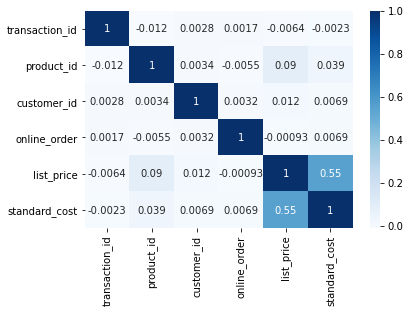

In [30]:
# Correlation matrix
corr = Transactions.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

- There are no major correlations except a positive correlation between list_price and standard_cost.

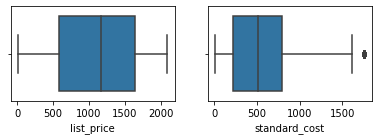

In [31]:
# Check for outliers
i=1
columns = ['list_price', 'standard_cost']
plt.figure(figsize=(10,8))
for j in columns:
    plt.subplot(4,3,i)
    sns.boxplot(data=Transactions,x=Transactions[j])
    i+=1

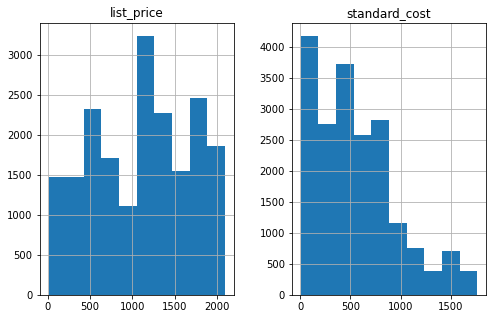

In [32]:
data = Transactions[['list_price', 'standard_cost']]
data.hist(figsize=(8,5))
plt.show()

- No variables follow a normal distribution.

In [33]:
# Calculate percentage of transactions by brand
data_brand = pd.DataFrame((Transactions.groupby(['brand'])['transaction_id'].count())/len(Transactions)*100)
data_brand = data_brand.sort_values(by=['transaction_id'], ascending=False)
data_brand = data_brand.reset_index()
data_brand

,brand,transaction_id
0,Solex,21.439959
1,WeareA2B,16.688095
2,Giant Bicycles,16.682952
3,OHM Cycles,15.392132
4,Trek Bicycles,15.073284
5,Norco Bicycles,14.723579


Text(0, 0.5, 'Percentage (%)')

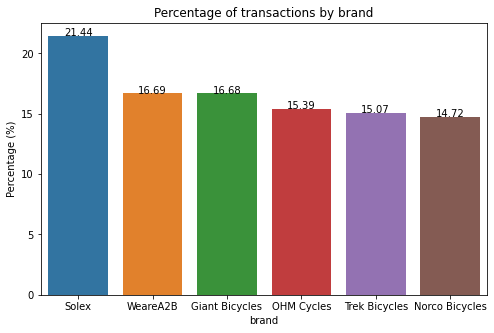

In [34]:
# Create bar plot
plt.figure(figsize=(8,5))
visual = sns.barplot(x="brand", y="transaction_id", data=data_brand )

for index, row in data_brand.iterrows():
    visual.text(row.name,row.transaction_id, round(row.transaction_id,2), color='black', ha="center")
plt.title('Percentage of transactions by brand')
plt.ylabel('Percentage (%)')

- Most of the brands are equally popular.

In [35]:
# Calculate percentage of transactions by product_line
data_line = pd.DataFrame((Transactions.groupby(['product_line'])['transaction_id'].count())/len(Transactions)*100)
data_line = data_line.sort_values(by=['transaction_id'], ascending=False)
data_line = data_line.reset_index()
data_line

,product_line,transaction_id
0,Standard,71.586526
1,Road,20.025714
2,Touring,6.238107
3,Mountain,2.149653


Text(0, 0.5, 'Percentage (%)')

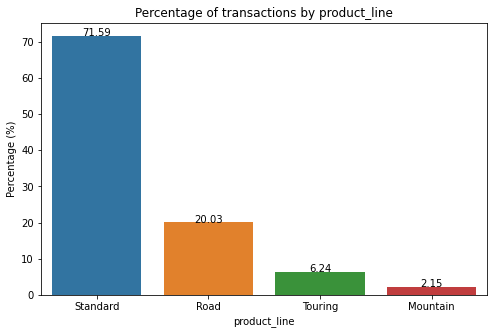

In [36]:
# Create bar plot
plt.figure(figsize=(8,5))
visual = sns.barplot(x="product_line", y="transaction_id", data=data_line )

for index, row in data_line.iterrows():
    visual.text(row.name,row.transaction_id, round(row.transaction_id,2), color='black', ha="center")
plt.title('Percentage of transactions by product_line')
plt.ylabel('Percentage (%)')

- Product line 'standard' is purchased most of the time, followed by 'road', ' touring', and 'mountain' products.

In [37]:
# Calculate percentage of transactions by product_class
data_class = pd.DataFrame((Transactions.groupby(['product_class'])['transaction_id'].count())/len(Transactions)*100)
data_class = data_class.sort_values(by=['transaction_id'], ascending=False)
data_class = data_class.reset_index()
data_class

,product_class,transaction_id
0,medium,69.874004
1,high,15.181281
2,low,14.944716


Text(0, 0.5, 'Percentage (%)')

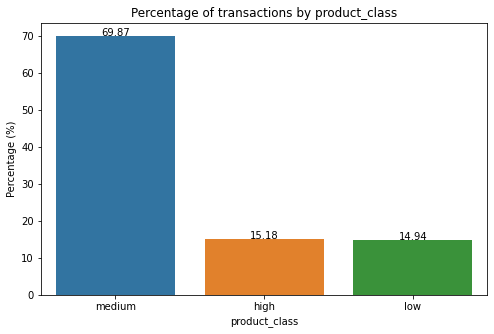

In [38]:
# Create bar plot
plt.figure(figsize=(8,5))
visual = sns.barplot(x="product_class", y="transaction_id", data=data_class )

for index, row in data_class.iterrows():
    visual.text(row.name,row.transaction_id, round(row.transaction_id,2), color='black', ha="center")
plt.title('Percentage of transactions by product_class')
plt.ylabel('Percentage (%)')

- Products with medium class is the most purchased, followed by high class and then low class.

In [39]:
# Calculate percentage of transactions by product_size
data_size = pd.DataFrame((Transactions.groupby(['product_size'])['transaction_id'].count())/len(Transactions)*100)
data_size = data_size.sort_values(by=['transaction_id'], ascending=False)
data_size = data_size.reset_index()
data_size

,product_size,transaction_id
0,medium,65.656981
1,large,20.056570
2,small,14.286449


- Products with medium size is the most purchased, followed by large size and then small size.

**END OF DATA EXPLORATION AND CLEANING**

## Customer Segmentation

### RFM (Recency, Frequency, & Monetaty) Modelling

In [40]:
# Take a look at the df again
Transactions.head(10)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10
5,6,25,2339,2017-03-08,1.0,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,2006-11-10
6,7,22,1542,2017-04-21,1.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,1993-07-15
7,8,15,2459,2017-07-15,0.0,Approved,WeareA2B,Standard,medium,medium,1292.84,13.44,2009-04-12
8,9,67,1305,2017-08-10,0.0,Approved,Solex,Standard,medium,large,1071.23,380.74,1991-08-05
9,10,12,3262,2017-08-30,1.0,Approved,WeareA2B,Standard,medium,medium,1231.15,161.60,2004-08-17


In [41]:
# Create a new column for the profit of each transaction
Transactions["order_profit"] = Transactions.list_price - Transactions.standard_cost
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,order_profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10,1055.82


In [42]:
# Recency = Latest Date - Last Transaction Date
# Last date
last_date = Transactions["transaction_date"].max()
last_date

Timestamp('2017-12-30 00:00:00')

In [43]:
# Create RFM Modelling scores
rfm_scores = Transactions[Transactions["order_status"] == "Approved"].groupby("customer_id").agg({
    "transaction_date": lambda x: (last_date - x.max()).days,
    "order_status": lambda x: len(x),
    "order_profit": lambda x: sum(x)})

rfm_scores

,transaction_date,order_status,order_profit
customer_id,,,
1,7,11,3018.090000
2,128,3,2226.260000
3,102,7,3290.210000
4,195,2,220.570000
5,16,6,2394.940000
...,...,...,...
3497,52,3,1648.320000
3498,127,6,3147.330000
3499,51,7,4955.250000


In [44]:
rfm_scores.dtypes

transaction_date      int64
order_status          int64
order_profit        float64
dtype: object

In [45]:
# Rename the columns
rfm_scores.columns = ["recency", "frequency", "monetary"]
rfm_scores

,recency,frequency,monetary
customer_id,,,
1,7,11,3018.090000
2,128,3,2226.260000
3,102,7,3290.210000
4,195,2,220.570000
5,16,6,2394.940000
...,...,...,...
3497,52,3,1648.320000
3498,127,6,3147.330000
3499,51,7,4955.250000


### Recency

In [46]:
# Statistics of recency
rfm_scores["recency"].describe()

count    3490.000000
mean       62.847564
std        59.365082
min         0.000000
25%        18.000000
50%        45.000000
75%        88.000000
max       353.000000
Name: recency, dtype: float64

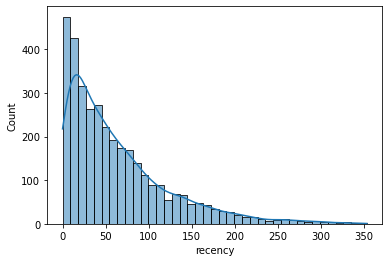

In [47]:
# Plotting the distribution
import seaborn as sns
ax = sns.histplot(rfm_scores["recency"], kde=True)

### Frequency

In [48]:
# Statistics of frequency
rfm_scores["frequency"].describe()

count    3490.000000
mean        5.522350
std         2.275693
min         1.000000
25%         4.000000
50%         5.000000
75%         7.000000
max        14.000000
Name: frequency, dtype: float64

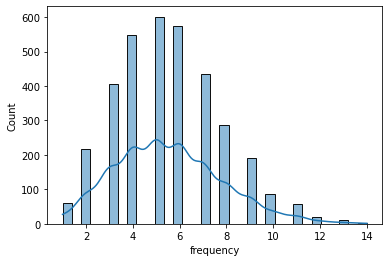

In [49]:
# Plotting the distribution
ax = sns.histplot(rfm_scores["frequency"], kde=True)

### Monetary

In [50]:
# # Statistics of frequency
rfm_scores["monetary"].describe()

count     3490.000000
mean      3046.604259
std       1742.425569
min         15.080000
25%       1779.610000
50%       2784.875000
75%       4094.235000
max      11668.950000
Name: monetary, dtype: float64

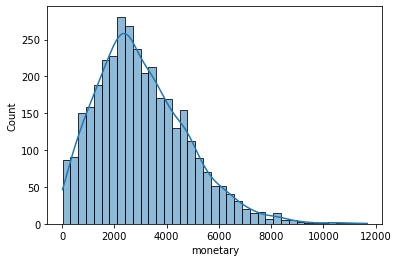

In [51]:
# Plotting the distribution
ax = sns.histplot(rfm_scores["monetary"], kde=True)

### Customer Segmentation
----

In [52]:
# Using quantiles to classify customers, setting into 4 segments
quantiles = rfm_scores.quantile([0.25, 0.5, 0.75])
quantiles = quantiles.to_dict()
quantiles

{'recency': {0.25: 18.0, 0.5: 45.0, 0.75: 88.0},
 'frequency': {0.25: 4.0, 0.5: 5.0, 0.75: 7.0},
 'monetary': {0.25: 1779.61, 0.5: 2784.875, 0.75: 4094.2349999999997}}

In [53]:
def rfm_tier(value, index, quantile):
    # If the index is recency, then the lower recency, the higher tier
    if value <= quantile[index][0.25]:
        if index == "recency":
            return 1
        else:
            return 4
    elif value <= quantile[index][0.50]:
        if index == "recency":
            return 2
        else:
            return 3
    elif value <= quantile[index][0.75]:
        if index == "recency":
            return 3
        else:
            return 2
    else:
        if index == "recency":
            return 4
        else:
            return 1

In [54]:
# Assigning tier values to R, F, and M for each customer
index_list = {"R": "recency", "F": "frequency", "M": "monetary"}
for k, v in index_list.items():
    rfm_scores[k] = rfm_scores[v].apply(rfm_tier, args=(v, quantiles))

rfm_scores

,recency,frequency,monetary,R,F,M
customer_id,,,,,,
1,7,11,3018.090000,1,1,2
2,128,3,2226.260000,4,4,3
3,102,7,3290.210000,4,2,2
4,195,2,220.570000,4,4,4
5,16,6,2394.940000,1,2,3
...,...,...,...,...,...,...
3497,52,3,1648.320000,3,4,4
3498,127,6,3147.330000,4,2,2
3499,51,7,4955.250000,3,2,1


In [55]:
# Assigning rfm_group to each customer by concatenating R, F, and M
rfm_scores["rfm_group"] = rfm_scores["R"].map(str) + rfm_scores["F"].map(str) + rfm_scores["M"].map(str)

# Calculating the rfm score for each customer by sum them
rfm_scores["rfm_score"] = rfm_scores[["R", "F", "M"]].sum(axis=1)

rfm_scores.head(10)

,recency,frequency,monetary,R,F,M,rfm_group,rfm_score
customer_id,,,,,,,,
1,7,11,3018.09,1,1,2,112,4
2,128,3,2226.26,4,4,3,443,11
3,102,7,3290.21,4,2,2,422,8
4,195,2,220.57,4,4,4,444,12
5,16,6,2394.94,1,2,3,123,6
6,64,5,3946.55,3,3,2,332,8
7,253,3,220.11,4,4,4,444,12
8,22,9,5364.39,2,1,1,211,4
9,78,6,2353.11,3,2,3,323,8


In [56]:
# Assigning loyalty tier to each customer
loyalty_tier = ["titanium", "platinum", "gold", "silver"]

# Using pandas quantile cut
score_cuts = pd.qcut(rfm_scores["rfm_score"], q = 4, labels=loyalty_tier)
score_cuts

customer_id
1       titanium
2         silver
3       platinum
4         silver
5       titanium
          ...   
3497      silver
3498    platinum
3499    titanium
3500        gold
5034      silver
Name: rfm_score, Length: 3490, dtype: category
Categories (4, object): ['titanium' < 'platinum' < 'gold' < 'silver']

In [57]:
# Create a new column for the loyalty tier
rfm_scores["loyalty_tier"] = score_cuts
rfm_scores.head(10)

,recency,frequency,monetary,R,F,M,rfm_group,rfm_score,loyalty_tier
customer_id,,,,,,,,,
1,7,11,3018.09,1,1,2,112,4,titanium
2,128,3,2226.26,4,4,3,443,11,silver
3,102,7,3290.21,4,2,2,422,8,platinum
4,195,2,220.57,4,4,4,444,12,silver
5,16,6,2394.94,1,2,3,123,6,titanium
6,64,5,3946.55,3,3,2,332,8,platinum
7,253,3,220.11,4,4,4,444,12,silver
8,22,9,5364.39,2,1,1,211,4,titanium
9,78,6,2353.11,3,2,3,323,8,platinum


In [58]:
# Find the most loyal customer who spent the most
rfm_scores.loc[rfm_scores["rfm_group"] == "111"].sort_values("monetary", ascending=False)

,recency,frequency,monetary,R,F,M,rfm_group,rfm_score,loyalty_tier
customer_id,,,,,,,,,
1460,12,8,10787.60,1,1,1,111,3,titanium
1558,8,9,10640.30,1,1,1,111,3,titanium
322,1,11,10336.77,1,1,1,111,3,titanium
729,1,9,8953.17,1,1,1,111,3,titanium
3232,8,13,8903.62,1,1,1,111,3,titanium
...,...,...,...,...,...,...,...,...,...
2072,8,13,4136.84,1,1,1,111,3,titanium
377,6,11,4124.42,1,1,1,111,3,titanium
1358,3,8,4113.04,1,1,1,111,3,titanium


#### The Most Loyal Customers
From the result above, we have 214 top-tier customers with rfm ranking "111". Besides, the most loyal customer #2183 spent more than $19000 on buying products with 14 transactions. His latest transaction was made 8 days ago.

In [59]:
# Get the top 1000 loyal customers
top_1000 = rfm_scores.sort_values("rfm_score").head(1000).sort_values("monetary", ascending=False)
top_1000

,recency,frequency,monetary,R,F,M,rfm_group,rfm_score,loyalty_tier
customer_id,,,,,,,,,
941,33,10,11668.95,2,1,1,211,4,titanium
2637,54,11,11222.65,3,1,1,311,5,titanium
1460,12,8,10787.60,1,1,1,111,3,titanium
1558,8,9,10640.30,1,1,1,111,3,titanium
3326,29,13,10422.04,2,1,1,211,4,titanium
...,...,...,...,...,...,...,...,...,...
2607,5,8,1943.51,1,1,3,113,5,titanium
470,9,7,1890.57,1,2,3,123,6,titanium
2958,4,6,1850.99,1,2,3,123,6,titanium


In [60]:
# Print the customer IDs from the top 1000 loyal customers
top_1000_ids = sorted(top_1000.index)
print(top_1000_ids)

[1, 8, 13, 21, 23, 24, 25, 29, 33, 37, 39, 41, 44, 47, 48, 50, 51, 52, 57, 58, 62, 69, 75, 76, 80, 86, 87, 89, 91, 94, 99, 109, 110, 112, 115, 116, 117, 124, 125, 127, 132, 134, 136, 139, 142, 144, 147, 151, 165, 167, 171, 173, 174, 177, 180, 182, 185, 187, 189, 195, 197, 198, 200, 201, 204, 211, 213, 215, 220, 221, 230, 234, 235, 237, 239, 246, 254, 255, 260, 270, 273, 280, 289, 295, 298, 307, 310, 312, 313, 314, 318, 320, 322, 328, 340, 344, 345, 346, 347, 352, 353, 357, 359, 360, 363, 364, 365, 368, 371, 372, 374, 377, 380, 381, 385, 394, 395, 396, 401, 402, 404, 405, 407, 408, 410, 418, 419, 420, 425, 426, 428, 429, 430, 432, 433, 438, 440, 442, 444, 445, 446, 453, 454, 461, 464, 465, 466, 469, 470, 473, 475, 478, 479, 482, 485, 490, 498, 499, 500, 505, 506, 507, 513, 515, 516, 517, 523, 529, 533, 534, 538, 545, 546, 548, 549, 556, 558, 560, 561, 576, 577, 579, 590, 593, 594, 605, 607, 611, 614, 621, 633, 634, 636, 637, 640, 647, 652, 656, 668, 669, 682, 691, 692, 695, 703, 704, 70

In [61]:
# Get the list of titanium cusomters
titanium_cusomters = rfm_scores[rfm_scores["loyalty_tier"] == "titanium"].sort_values("monetary", ascending=False)
titanium_cusomters

,recency,frequency,monetary,R,F,M,rfm_group,rfm_score,loyalty_tier
customer_id,,,,,,,,,
941,33,10,11668.95,2,1,1,211,4,titanium
2637,54,11,11222.65,3,1,1,311,5,titanium
1460,12,8,10787.60,1,1,1,111,3,titanium
1558,8,9,10640.30,1,1,1,111,3,titanium
3326,29,13,10422.04,2,1,1,211,4,titanium
...,...,...,...,...,...,...,...,...,...
717,14,6,1857.27,1,2,3,123,6,titanium
2958,4,6,1850.99,1,2,3,123,6,titanium
1467,13,7,1825.83,1,2,3,123,6,titanium


## Monthly Revenue

In [62]:
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,order_profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10,1055.82


In [63]:
#creating YearMonth field for the ease of reporting and visualization
Transactions['transaction_month'] = Transactions['transaction_date'].map(lambda x: 100*x.year + x.month)
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,order_profit,transaction_month
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02,17.87,201702
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,1702.55,201705
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20,1544.61,201710
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16,817.36,201708
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10,1055.82,201710


In [64]:
# Calculate the monthly revenue
monthly_revenue = Transactions.groupby("transaction_month")[["list_price", "order_profit"]].agg(["sum", "mean"]).reset_index()
monthly_revenue

transaction_month  list_price                order_profit            
                             sum         mean            sum        mean
0             201701  1814943.49  1110.736530  915151.359988  560.068152
1             201702  1744536.31  1105.536318  852514.230000  540.249829
2             201703  1752618.98  1097.444571  865312.550000  541.836287
3             201704  1791861.52  1110.887489  888856.890000  551.058208
4             201705  1864538.66  1136.220999  904003.210000  550.885564
5             201706  1709785.22  1112.417189  841815.260000  547.700234
6             201707  1837843.44  1100.505054  919677.790000  550.705263
7             201708  1882049.62  1105.137769  951376.270000  558.647252
8             201709  1698320.44  1107.118931  843736.130000  550.023553
9             201710  1911531.54  1109.420511  968986.414984  562.383294
10            201711  1755629.99  1092.489104  900817.570000  560.558538
11            201712  1768512.51  1099.821213  876568.660000  545.129764

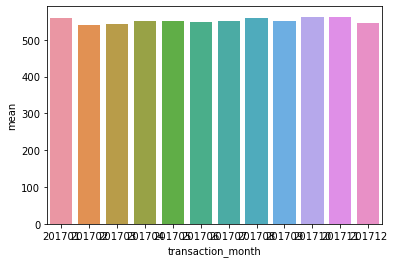

In [65]:
# Visualize the monthly avg profit per order
ax = sns.barplot(x=monthly_revenue.transaction_month, y=monthly_revenue["order_profit"]["mean"])


## New Customers by Month

In [66]:
# Create a df containing the first purchase data
first_date_purchase = Transactions.groupby(["customer_id"])["transaction_date"].min().reset_index()
first_date_purchase

,customer_id,transaction_date
0,1,2017-01-05
1,2,2017-05-04
2,3,2017-02-23
3,4,2017-04-03
4,5,2017-03-03
...,...,...
3487,3497,2017-09-01
3488,3498,2017-02-03
3489,3499,2017-01-12
3490,3500,2017-01-09


In [67]:
# Rename columns and set index for a Time Series df
first_date_purchase.columns = ["customer_id", "first_transaction_date"]
first_date_purchase.set_index("first_transaction_date", inplace=True)
first_date_purchase

,customer_id
first_transaction_date,
2017-01-05,1
2017-05-04,2
2017-02-23,3
2017-04-03,4
2017-03-03,5
...,...
2017-09-01,3497
2017-02-03,3498
2017-01-12,3499


In [68]:
# Resample to get monthly new user count
new_customers = first_date_purchase.resample("M").count()
new_customers

,customer_id
first_transaction_date,
2017-01-31,1321
2017-02-28,794
2017-03-31,490
2017-04-30,341
2017-05-31,214
2017-06-30,128
2017-07-31,83
2017-08-31,54
2017-09-30,25


[Text(0, 0, '2017-01-31 00:00:00'),
 Text(1, 0, '2017-02-28 00:00:00'),
 Text(2, 0, '2017-03-31 00:00:00'),
 Text(3, 0, '2017-04-30 00:00:00'),
 Text(4, 0, '2017-05-31 00:00:00'),
 Text(5, 0, '2017-06-30 00:00:00'),
 Text(6, 0, '2017-07-31 00:00:00'),
 Text(7, 0, '2017-08-31 00:00:00'),
 Text(8, 0, '2017-09-30 00:00:00'),
 Text(9, 0, '2017-10-31 00:00:00'),
 Text(10, 0, '2017-11-30 00:00:00'),
 Text(11, 0, '2017-12-31 00:00:00')]

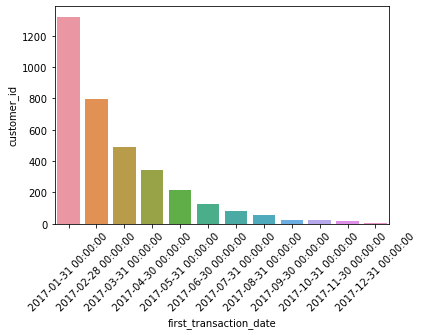

In [70]:
# Visualize the monthly new customers
ax = sns.barplot(x=new_customers.index, y=new_customers.customer_id)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)



## Active Customers by Month

In [82]:
# Create a df containing active customer every month
active_customers = Transactions.groupby(["transaction_month"])["customer_id"].nunique().reset_index()
active_customers

,transaction_month,customer_id
0,201701,1321
1,201702,1258
2,201703,1277
3,201704,1284
4,201705,1281
5,201706,1238
6,201707,1327
7,201708,1346
8,201709,1240
9,201710,1378


In [83]:
# Grt new customers by month through groupby transaction_month 
first_purchase_month = Transactions.groupby(["customer_id"])["transaction_month"].min().reset_index()
new_customers_2 = first_purchase_month.groupby(["transaction_month"])["customer_id"].count().reset_index()
new_customers_2.customer_id

0     1321
1      794
2      490
3      341
4      214
5      128
6       83
7       54
8       25
9       23
10      15
11       4
Name: customer_id, dtype: int64

In [84]:
# Combine monthly active and new customers
active_customers["new_customers"] = new_customers_2.customer_id
active_customers["existing_customers"] = active_customers.customer_id - active_customers.new_customers
active_customers.columns = ["month", "active_customers", "new_customers", "existing_customers"]
active_customers

,month,active_customers,new_customers,existing_customers
0,201701,1321,1321,0
1,201702,1258,794,464
2,201703,1277,490,787
3,201704,1284,341,943
4,201705,1281,214,1067
5,201706,1238,128,1110
6,201707,1327,83,1244
7,201708,1346,54,1292
8,201709,1240,25,1215
9,201710,1378,23,1355
